### Importing required packages

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Set folder path and get the list of all the .csv files

In [3]:
folder_path = r'C:\Users\DELL\Downloads\Cyclistic'

# getting the list of all the 12 .csv files
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

### Combine all the .csv files into one DataFrame

In [4]:
combined_df = pd.concat(
    (pd.read_csv(os.path.join(folder_path, file)) for file in csv_files),
    ignore_index=True
)

### Save the combined .CSV file

In [5]:
output_file = os.path.join(folder_path, 'combined_cyclistic_data.csv')
combined_df.to_csv(output_file, index=False)

# confirming if all the files are combined and saved successfully
print(f"All files combined and saved to: {output_file}")

All files combined and saved to: C:\Users\DELL\Downloads\Cyclistic\combined_cyclistic_data.csv


### Load the combined csv file

In [6]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\Cyclistic\combined_cyclistic_data.csv')

### Data cleaning
Here we will perform data cleaning such as changing the format of data etc

In [7]:
# Converting 'started_at' and 'ended_at' columns to datetime
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce', dayfirst=False)
df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce', dayfirst=False)

# Check for rows where conversion failed
invalid_start = df[df['started_at'].isna()]
invalid_end = df[df['ended_at'].isna()]

if not invalid_start.empty:
    print(f"Found {len(invalid_start)} rows with invalid 'started_at' dates.")
if not invalid_end.empty:
    print(f"Found {len(invalid_end)} rows with invalid 'ended_at' dates.")

Found 5333470 rows with invalid 'started_at' dates.
Found 5333470 rows with invalid 'ended_at' dates.


In [8]:
# Calculate 'ride_length' in minutes
df['ride_length'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Extract 'day_of_week' from 'started_at'
df['day_of_week'] = df['started_at'].dt.day_name()

# Remove rows with missing station names or negative ride lengths
df_cleaned = df.dropna(subset=['start_station_name', 'end_station_name'])
df_cleaned = df_cleaned[df_cleaned['ride_length'] > 0]

### Now convert the 'started_at' and 'ended_at' columns into strings to eliminate the remaining errors

In [9]:
df['started_at_str'] = df['started_at'].astype(str)
df['ended_at_str'] = df['ended_at'].astype(str)

# Check for rows with milliseconds in 'started_at'
df_invalid_dates = df[df['started_at_str'].str.contains(r'\.\d{3}', na=False)]

# Print rows with problematic date formats
print(df_invalid_dates[['started_at', 'ended_at']])

# Fix malformed dates by removing the milliseconds
df['started_at'] = df['started_at_str'].str.replace(r'\.\d{3}', '', regex=True)
df['ended_at'] = df['ended_at_str'].str.replace(r'\.\d{3}', '', regex=True)

Empty DataFrame
Columns: [started_at, ended_at]
Index: []


### Convert back to datetime format

In [10]:
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')

### Recalculate the 'ride_length'

In [11]:
df['ride_length'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60
df['day_of_week'] = df['started_at'].dt.day_name()

### Filter out the rows with missing station_names or neagtive ride_lengths

In [12]:
df_cleaned = df.dropna(subset=['start_station_name', 'end_station_name'])
df_cleaned = df_cleaned[df_cleaned['ride_length'] > 0]

### Save the cleaned dataset as a .csv file

In [13]:
df_cleaned.to_csv('cleaned_cyclistic_data.csv', index=False)

print("Malformed dates fixed and data cleaned.")

Malformed dates fixed and data cleaned.


### Checking if data cleaning was complete

In [14]:
df = pd.read_csv(r"cleaned_cyclistic_data.csv")
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,started_at_str,ended_at_str
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member,7.533333,Friday,2024-01-12 15:30:27,2024-01-12 15:37:59
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member,7.216667,Monday,2024-01-08 15:45:46,2024-01-08 15:52:59
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member,8.000000,Saturday,2024-01-27 12:27:19,2024-01-27 12:35:19
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member,29.816667,Monday,2024-01-29 16:26:17,2024-01-29 16:56:06
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member,26.200000,Wednesday,2024-01-31 05:43:23,2024-01-31 06:09:35


In [15]:
# checking the data type of columns
df.dtypes

# so we can see that data type of all the columns are correct

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
ride_length           float64
day_of_week            object
started_at_str         object
ended_at_str           object
dtype: object

### Drop the temporary string columns such as started_at_str and ended_at_str

In [16]:
df_cleaned = df_cleaned.drop(columns=['started_at_str', 'ended_at_str'])

# Verify that the columns were dropped
print(df_cleaned.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'ride_length', 'day_of_week'],
      dtype='object')


In [17]:
### Check for missing values in cleaned DataFrame
print(df_cleaned.isnull().sum())

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_length           0
day_of_week           0
dtype: int64


In [18]:
### Check for data types of all the columns one last time
print(df_cleaned.dtypes)

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
ride_length                  float64
day_of_week                   object
dtype: object


### Give the columns more reasonable names

In [19]:
# Create a mapping of old column names to new names
rename_columns = {
    'ride_id': 'Ride_ID',
    'rideable_type': 'Bike_type',
    'started_at': 'Start_time',
    'ended_at': 'End_time',
    'start_station_name': 'Start_Station',
    'start_station_id': 'Start_Station_ID',
    'end_station_name': 'End_Station',
    'end_station_id': 'End_Station_ID',
    'start_lat': 'Start_latitude',
    'start_lng': 'Start_longitude',
    'end_lat': 'End_latitude',
    'end_lng': 'End_longitude',
    'member_casual': 'User_Type',
    'ride_length': 'Ride_Duration_Min',
    'day_of_week': 'Day_Of_Week'
}
# Apply renaming of columns
df_cleaned = df_cleaned.rename(columns=rename_columns)

# Check the updated column names
print(df_cleaned.columns)

Index(['Ride_ID', 'Bike_type', 'Start_time', 'End_time', 'Start_Station',
       'Start_Station_ID', 'End_Station', 'End_Station_ID', 'Start_latitude',
       'Start_longitude', 'End_latitude', 'End_longitude', 'User_Type',
       'Ride_Duration_Min', 'Day_Of_Week'],
      dtype='object')


In [21]:
df_cleaned.head()

,Ride_ID,Bike_type,Start_time,End_time,Start_Station,Start_Station_ID,End_Station,End_Station_ID,Start_latitude,Start_longitude,End_latitude,End_longitude,User_Type,Ride_Duration_Min,Day_Of_Week
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member,7.533333,Friday
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member,7.216667,Monday
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member,8.000000,Saturday
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member,29.816667,Monday
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member,26.200000,Wednesday


### Save the dataset to a new .csv file

In [22]:
df_cleaned.to_csv('cleaned_cyclistic_data.csv', index=False)

## Now we will Perform data analysis
We will perform data analysis to gather some useful insights

In [25]:
# Total rides done across 12 months
total_rides = len(df_cleaned)
print("Total rides:", total_rides)

Total rides: 2537202


In [27]:
# Rides by user_types(Members vs casual)
user_type_counts = df_cleaned['User_Type'].value_counts()
print(user_type_counts)

User_Type
member    1777076
casual     760126
Name: count, dtype: int64


In [29]:
# Overall average ride duration
average_ride_duration = df_cleaned['Ride_Duration_Min'].mean()
print("Average ride duration (minutes):", round(average_ride_duration, 2))

Average ride duration (minutes): 15.87


In [30]:
# Average ride duration by user type
avg_duration_by_user = df_cleaned.groupby('User_Type')['Ride_Duration_Min'].mean()
print(avg_duration_by_user)

User_Type
casual    24.318651
member    12.263075
Name: Ride_Duration_Min, dtype: float64


In [31]:
# Average Ride Duration by Day of the Week and User Type
avg_duration_day_user = df_cleaned.groupby(['User_Type', 'Day_Of_Week'])['Ride_Duration_Min'].mean().reset_index()
print(avg_duration_day_user)

   User_Type Day_Of_Week  Ride_Duration_Min
0     casual      Friday          22.791089
1     casual      Monday          24.211561
2     casual    Saturday          28.095076
3     casual      Sunday          28.765028
4     casual    Thursday          19.543267
5     casual     Tuesday          20.762886
6     casual   Wednesday          21.213848
7     member      Friday          11.652485
8     member      Monday          11.857485
9     member    Saturday          14.034996
10    member      Sunday          13.709608
11    member    Thursday          11.450787
12    member     Tuesday          11.989946
13    member   Wednesday          12.035865


In [32]:
# Number of rides per day of week
rides_per_day = df_cleaned.groupby(['User_Type', 'Day_Of_Week']).size().reset_index(name='number_of_rides')
print(rides_per_day)

   User_Type Day_Of_Week  number_of_rides
0     casual      Friday           106018
1     casual      Monday            96740
2     casual    Saturday           162914
3     casual      Sunday           127892
4     casual    Thursday            86648
5     casual     Tuesday            86936
6     casual   Wednesday            92978
7     member      Friday           244192
8     member      Monday           265340
9     member    Saturday           210636
10    member      Sunday           181352
11    member    Thursday           284904
12    member     Tuesday           287812
13    member   Wednesday           302840


In [33]:
# Bike type usage
bike_type_usage = df_cleaned.groupby(['User_Type', 'Bike_type']).size().reset_index(name='number_of_rides')
print(bike_type_usage)

  User_Type      Bike_type  number_of_rides
0    casual   classic_bike           501216
1    casual  electric_bike           258910
2    member   classic_bike          1215098
3    member  electric_bike           561978


In [35]:
# Hourly usage
df_cleaned['start_hour'] = df_cleaned['Start_time'].dt.hour
rides_by_hour = df_cleaned.groupby(['User_Type', 'start_hour']).size().reset_index(name='number_of_rides')
print(rides_by_hour)

   User_Type  start_hour  number_of_rides
0     casual           0             8918
1     casual           1             5934
2     casual           2             3698
3     casual           3             2004
4     casual           4             1430
5     casual           5             3798
6     casual           6             9124
7     casual           7            18638
8     casual           8            27098
9     casual           9            27080
10    casual          10            34806
11    casual          11            44898
12    casual          12            54464
13    casual          13            57226
14    casual          14            59240
15    casual          15            64662
16    casual          16            75274
17    casual          17            77896
18    casual          18            60138
19    casual          19            41716
20    casual          20            27820
21    casual          21            22286
22    casual          22          

## Now visualize the insights

### 1. Rides By User_Type

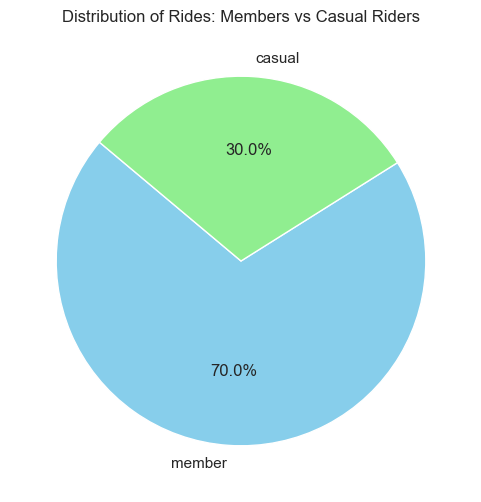

In [38]:
sns.set_theme(style="whitegrid")
user_type_counts = df_cleaned['User_Type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(user_type_counts, labels=user_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Rides: Members vs Casual Riders')
plt.show()

### 2. Number of rides by Day_Of_Week

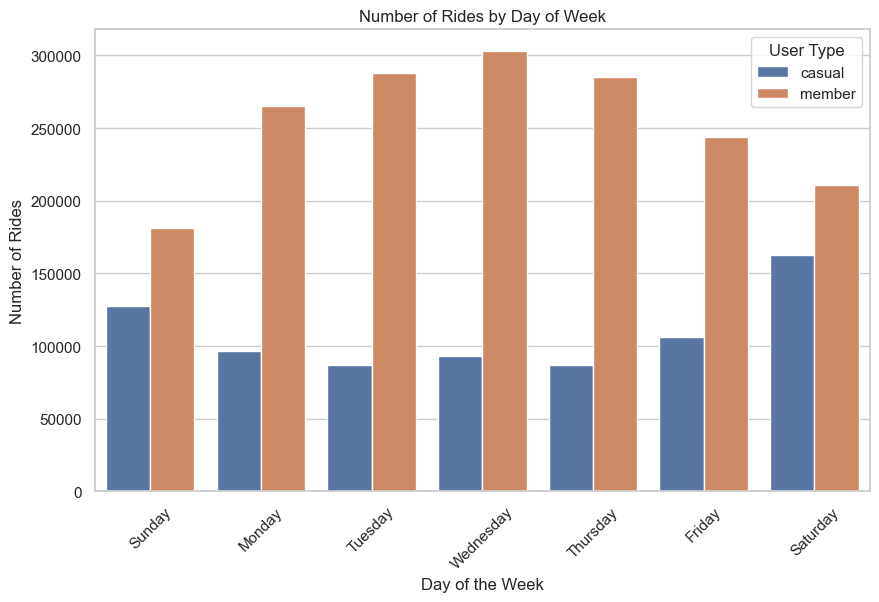

In [47]:
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

rides_per_day = df_cleaned.groupby(['User_Type', 'Day_Of_Week']).size().reset_index(name='number_of_rides')

plt.figure(figsize=(10,6))
sns.barplot(data=rides_per_day, x='Day_Of_Week', y='number_of_rides', hue='User_Type', order=day_order)
plt.title('Number of Rides by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.legend(title='User Type')
plt.xticks(rotation=45)
plt.show()

### 3. Average ride duration by User_Type

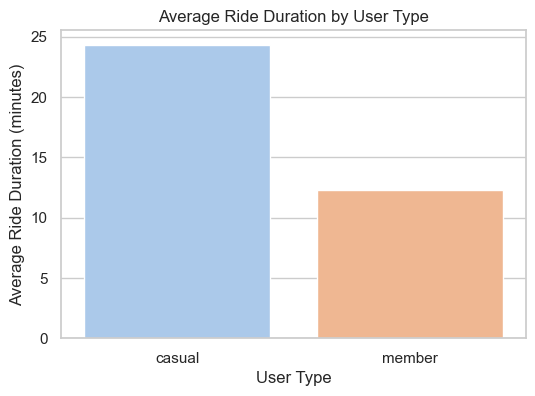

In [48]:
avg_duration_by_user = df_cleaned.groupby('User_Type')['Ride_Duration_Min'].mean().reset_index()

# Bar chart
plt.figure(figsize=(6,4))
sns.barplot(data=avg_duration_by_user, x='User_Type', y='Ride_Duration_Min',hue = 'User_Type', palette='pastel')
plt.title('Average Ride Duration by User Type')
plt.ylabel('Average Ride Duration (minutes)')
plt.xlabel('User Type')
plt.show()

### 4. Bike Type usage

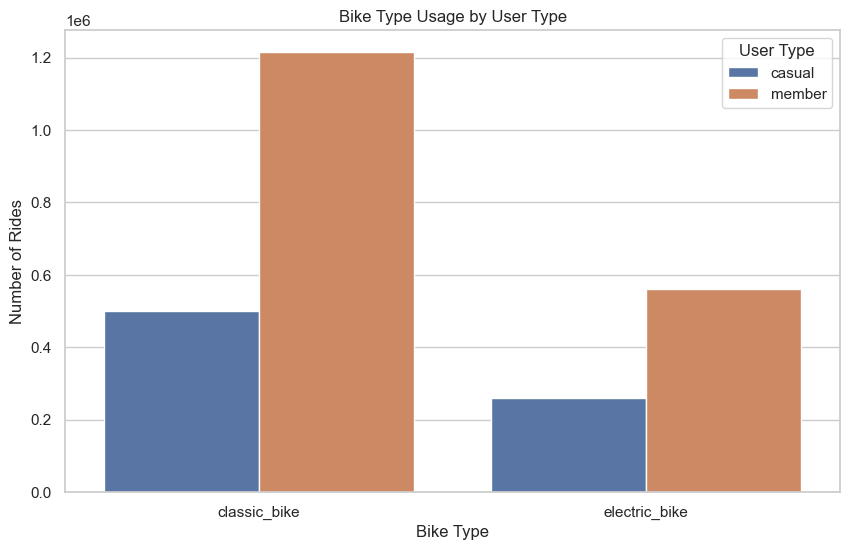

In [49]:
# Bike Type usage
bike_type_usage = df_cleaned.groupby(['User_Type', 'Bike_type']).size().reset_index(name='number_of_rides')

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=bike_type_usage, x='Bike_type', y='number_of_rides', hue='User_Type')
plt.title('Bike Type Usage by User Type')
plt.xlabel('Bike Type')
plt.ylabel('Number of Rides')
plt.legend(title='User Type')
plt.show()

### 5. Rides By hour of day

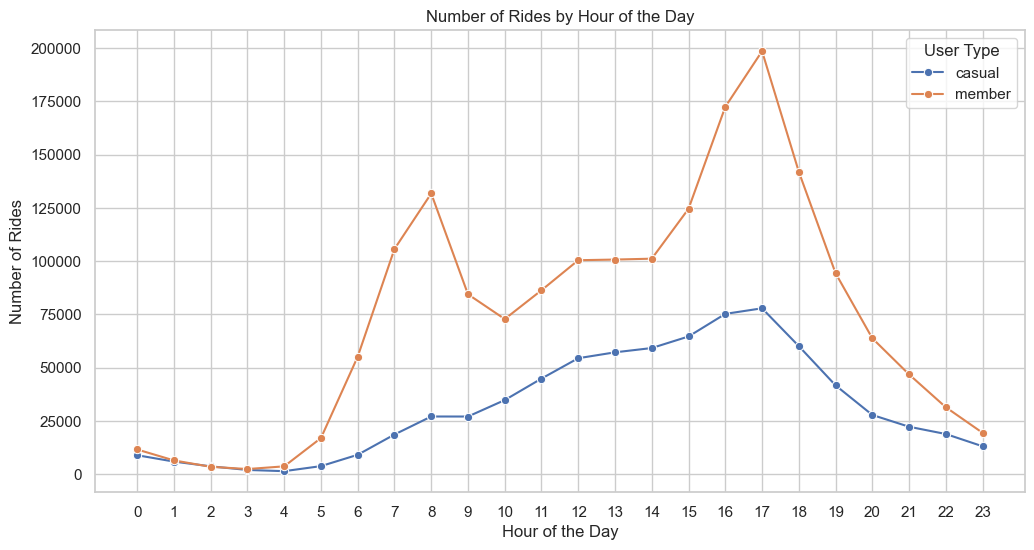

In [50]:
# Create 'start_hour' column if missing
if 'start_hour' not in df_cleaned.columns:
    df_cleaned['start_hour'] = df_cleaned['Start_time'].dt.hour

rides_by_hour = df_cleaned.groupby(['User_Type', 'start_hour']).size().reset_index(name='number_of_rides')

# Line plot
plt.figure(figsize=(12,6))
sns.lineplot(data=rides_by_hour, x='start_hour', y='number_of_rides', hue='User_Type', marker="o")
plt.title('Number of Rides by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0,24))
plt.grid(True)
plt.legend(title='User Type')
plt.show()


### Key insights
1) User distribution:
    According to the pie chart 70% riders are memebrs and 30% riders are casual
   
2) Ride behaviour by Day_Of_Week:
    Casual riders prefer weekends such as saturdays and sundays while memebers prefer the rides during weekdays. So it shows that they both have            different purposes.
   
3) Ride Duration:
    Casual riders take longer rides on average compared to members.
    Members prefer shorter, quicker rides — likely for commuting or short trips.

4) Bike Type Preference:
    Casual riders tend to use classic bikes more
    Members use a mix of classic and electric bikes.
    E-bikes are getting increasingly popular among both groups.

5) Peak Ride Hours:
    Casual riders are most active during late mornings to afternoons (10 AM - 4 PM).
    Members show clear peaks at morning (8 AM) and evening (5-6 PM) — classic work commute patterns.


### Business Recommendations
1) Target Casual Riders with Weekend Promotions:
    Launch special weekend discounts or day passes to encourage casual riders to ride more often.

2) Encourage the casual users to buy the membership:
    Highlight membership benefits like cost savings and ride flexibility during weekend rides (through app notifications, email marketing).

3) Promote E-Bike Membership Packages:
    Since e-bikes are popular, create special membership packages offering free or discounted e-bike usage.

4) Commuter-Focused Marketing for Members:
    Develop monthly commuter plans targeting working professionals, offering additional perks like guaranteed bike availability during rush hours.

5) Optimize Bike Distribution:
    Based on peak usage times, reallocate bikes to busy areas in the morning (offices, business hubs) and evening (residential areas).
    Make sure enough bikes are available for casual riders at parks, waterfronts, and tourist spots during weekends.